In [2]:
import os
os.chdir('/Users/ronaldliu/Downloads/jiang_2023/Scripts_2')
os.getcwd()
os.listdir()
import os
from Portfolio import portfolio as pf
import pandas as pd
from Data import equity_data as eqd

/Users/ronaldliu/Downloads/jiang_2023/cnn_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
eqd.processed_US_data()

Reading raw data from ../WORK_SPACE/data/stocks_dataset/raw_data/us_920101-200731.csv
finish reading data in 1.14 s
Freq: week: 9459275/53142478 preriod_end_dates from                         1993-01-29 00:00:00, 1993-02-05 00:00:00,  to 2019-12-31 00:00:00
df Ret_week 9435874/53142478 not nan
Freq: month: 2396911/53142478 preriod_end_dates from                         1993-01-29 00:00:00, 1993-02-26 00:00:00,  to 2019-12-31 00:00:00
df Ret_month 2373517/53142478 not nan
Freq: quarter: 799211/53142478 preriod_end_dates from                         1993-03-31 00:00:00, 1993-06-30 00:00:00,  to 2019-12-31 00:00:00
df Ret_quarter 775891/53142478 not nan
Calculating 5d return
Calculating 20d return
Calculating 60d return
Calculating 65d return
Calculating 180d return
Calculating 250d return
Calculating 260d return


EXCHCD         Low        High       Close         Vol  \
Date       StockID                                                           
1992-01-02 10001       3.0    14.50000    14.50000    14.50000       100.0   
           10002       3.0     5.50000     6.50000     6.00000         NaN   
           10003       3.0     1.18750     1.50000     1.34375         NaN   
           10009       3.0     7.75000     8.50000     8.12500         NaN   
           10010       3.0    13.37500    14.25000    14.00000    236059.0   
...                    ...         ...         ...         ...         ...   
2020-07-31 93426       1.0    24.54000    25.47000    25.45000     98671.0   
           93427       1.0    71.13000    72.71000    72.63000    270434.0   
           93429       5.0    85.54010    87.88000    87.70000   1114102.0   
           93434       3.0     2.25000     2.38000     2.33000     33861.0   
           93436       3.0  1420.97998  1517.05005  1430.76001  12218466.0   

                         Ret    Shares     Open     MarketCap   log_ret  ...  \
Date       StockID                                                       ...   
1992-01-02 10001    0.000000    1075.0      NaN  1.558750e+04  0.000000  ...   
           10002    0.000000    1175.0      NaN  7.050000e+03  0.000000  ...   
           10003    0.131579    2194.0      NaN  2.948188e+03  0.123614  ...   
           10009    0.015625    1158.0      NaN  9.408750e+03  0.015504  ...   
           10010   -0.008850    7567.0      NaN  1.059380e+05 -0.008889  ...   
...                      ...       ...      ...           ...       ...  ...   
2020-07-31 93426    0.005929   12544.0    25.17  3.192448e+05  0.005911  ...   
           93427    0.006932   36722.0    72.28  2.667119e+06  0.006908  ...   
           93429    0.009322  109720.0    87.39  9.622444e+06  0.009279  ...   
           93434    0.017467   33433.0     2.27  7.789889e+04  0.017316  ...   
           93436   -0.038138  186362.0  1515.00  2.666393e+08 -0.038884  ...   

                    Ret_week  Ret_month  Ret_quarter        Ret_5d   Ret_20d  \
Date       StockID                                                             
1992-01-02 10001         NaN        NaN          NaN -1.021660e-07 -0.051722   
           10002         NaN        NaN          NaN  0.000000e+00  0.020833   
           10003         NaN        NaN          NaN  6.744195e-01  1.232562   
           10009         NaN        NaN          NaN -1.538378e-02 -0.015384   
           10010         NaN        NaN          NaN  1.071417e-01  0.053569   
...                      ...        ...          ...           ...       ...   
2020-07-31 93426         NaN        NaN          NaN           NaN       NaN   
           93427         NaN        NaN          NaN           NaN       NaN   
           93429         NaN        NaN          NaN           NaN       NaN   
           93434         NaN        NaN          NaN           NaN       NaN   
           93436         NaN        NaN          NaN           NaN       NaN   

                     Ret_60d   Ret_65d  Ret_180d  Ret_250d  Ret_260d  
Date       StockID                                                    
1992-01-02 10001   -0.161618 -0.161618  0.011575  0.013423  0.031520  
           10002    0.062499  0.062499  0.541668  0.583337  0.666671  
           10003    1.139535  1.139537  0.674425  1.976750  1.790701  
           10009    0.078125  0.031249  0.472104  0.520453  0.520455  
           10010   -0.044643 -0.089287 -0.419645 -0.178575 -0.142862  
...                      ...       ...       ...       ...       ...  
2020-07-31 93426         NaN       NaN       NaN       NaN       NaN  
           93427         NaN       NaN       NaN       NaN       NaN  
           93429         NaN       NaN       NaN       NaN       NaN  
           93434         NaN       NaN       NaN       NaN       NaN  
           93436         NaN       NaN       NaN       NaN       NaN  


In [2]:
eqd.processed_US_data()

Reading raw data from ../WORK_SPACE/data/stocks_dataset/raw_data/us_920101-200731.csv
finish reading data in 1.12 s
Freq: week: 9459275/53142478 preriod_end_dates from                         1993-01-29 00:00:00, 1993-02-05 00:00:00,  to 2019-12-31 00:00:00
df Ret_week 9435874/53142478 not nan
Freq: month: 2396911/53142478 preriod_end_dates from                         1993-01-29 00:00:00, 1993-02-26 00:00:00,  to 2019-12-31 00:00:00
df Ret_month 2373517/53142478 not nan
Freq: quarter: 799211/53142478 preriod_end_dates from                         1993-03-31 00:00:00, 1993-06-30 00:00:00,  to 2019-12-31 00:00:00
df Ret_quarter 775891/53142478 not nan
Calculating 5d return
Calculating 20d return
Calculating 60d return
Calculating 65d return
Calculating 180d return
Calculating 250d return
Calculating 260d return


EXCHCD         Low        High       Close         Vol  \
Date       StockID                                                           
1992-01-02 10001       3.0    14.50000    14.50000    14.50000       100.0   
           10002       3.0     5.50000     6.50000     6.00000         NaN   
           10003       3.0     1.18750     1.50000     1.34375         NaN   
           10009       3.0     7.75000     8.50000     8.12500         NaN   
           10010       3.0    13.37500    14.25000    14.00000    236059.0   
...                    ...         ...         ...         ...         ...   
2020-07-31 93426       1.0    24.54000    25.47000    25.45000     98671.0   
           93427       1.0    71.13000    72.71000    72.63000    270434.0   
           93429       5.0    85.54010    87.88000    87.70000   1114102.0   
           93434       3.0     2.25000     2.38000     2.33000     33861.0   
           93436       3.0  1420.97998  1517.05005  1430.76001  12218466.0   

                         Ret    Shares     Open     MarketCap   log_ret  ...  \
Date       StockID                                                       ...   
1992-01-02 10001    0.000000    1075.0      NaN  1.558750e+04  0.000000  ...   
           10002    0.000000    1175.0      NaN  7.050000e+03  0.000000  ...   
           10003    0.131579    2194.0      NaN  2.948188e+03  0.123614  ...   
           10009    0.015625    1158.0      NaN  9.408750e+03  0.015504  ...   
           10010   -0.008850    7567.0      NaN  1.059380e+05 -0.008889  ...   
...                      ...       ...      ...           ...       ...  ...   
2020-07-31 93426    0.005929   12544.0    25.17  3.192448e+05  0.005911  ...   
           93427    0.006932   36722.0    72.28  2.667119e+06  0.006908  ...   
           93429    0.009322  109720.0    87.39  9.622444e+06  0.009279  ...   
           93434    0.017467   33433.0     2.27  7.789889e+04  0.017316  ...   
           93436   -0.038138  186362.0  1515.00  2.666393e+08 -0.038884  ...   

                    Ret_week  Ret_month  Ret_quarter        Ret_5d   Ret_20d  \
Date       StockID                                                             
1992-01-02 10001         NaN        NaN          NaN -1.021660e-07 -0.051722   
           10002         NaN        NaN          NaN  0.000000e+00  0.020833   
           10003         NaN        NaN          NaN  6.744195e-01  1.232562   
           10009         NaN        NaN          NaN -1.538378e-02 -0.015384   
           10010         NaN        NaN          NaN  1.071417e-01  0.053569   
...                      ...        ...          ...           ...       ...   
2020-07-31 93426         NaN        NaN          NaN           NaN       NaN   
           93427         NaN        NaN          NaN           NaN       NaN   
           93429         NaN        NaN          NaN           NaN       NaN   
           93434         NaN        NaN          NaN           NaN       NaN   
           93436         NaN        NaN          NaN           NaN       NaN   

                     Ret_60d   Ret_65d  Ret_180d  Ret_250d  Ret_260d  
Date       StockID                                                    
1992-01-02 10001   -0.161618 -0.161618  0.011575  0.013423  0.031520  
           10002    0.062499  0.062499  0.541668  0.583337  0.666671  
           10003    1.139535  1.139537  0.674425  1.976750  1.790701  
           10009    0.078125  0.031249  0.472104  0.520453  0.520455  
           10010   -0.044643 -0.089287 -0.419645 -0.178575 -0.142862  
...                      ...       ...       ...       ...       ...  
2020-07-31 93426         NaN       NaN       NaN       NaN       NaN  
           93427         NaN       NaN       NaN       NaN       NaN  
           93429         NaN       NaN       NaN       NaN       NaN  
           93434         NaN       NaN       NaN       NaN       NaN  
           93436         NaN       NaN       NaN       NaN       NaN  


In [3]:
pcnd = eqd.processed_CN_data()
pcnd.columns
pcnd

Reading raw data from ../WORK_SPACE/data/stocks_dataset/raw_data/CSMAR/cn_93-25.csv
Finish reading data in 24.02 s


Open        High         Low       Close  \
Date       StockID                                                   
1990-12-19 600601   185.300000  185.300000  185.300000  185.300000   
           600602   365.700000  384.000000  365.700000  384.000000   
           600651   320.300000  320.300000  320.300000  320.300000   
           600656   260.000000  260.000000  260.000000  260.000000   
1990-12-20 600601   185.300000  194.600000  185.300000  194.600000   
...                        ...         ...         ...         ...   
2025-05-30 920445    16.829730   16.829730   16.124484   16.252711   
           920489    44.626957   44.788389   42.869143   43.120259   
           920682    27.315841   27.315841   26.074212   26.281150   
           920799   193.539229  193.633058  182.592440  183.593289   
           920819     5.091573    5.125517    4.978427    4.978427   

                           Vol       Ret  EXCHCD         Shares  
Date       StockID                                               
1990-12-19 600601        200.0  2.706000     1.0     910.000000  
           600602       1160.0  2.840000     1.0     491.000000  
           600651          2.0  3.575714     1.0      33.000000  
           600656         50.0  1.600000     1.0     450.110000  
1990-12-20 600601         84.0  0.050189     1.0     910.000000  
...                        ...       ...     ...            ...  
2025-05-30 920445    3042766.0 -0.031519    64.0   40973.132181  
           920489    6858674.0 -0.042613    64.0   26635.162400  
           920682    8506585.0 -0.044214    64.0   28145.264195  
           920799    7592224.0 -0.033108    64.0   12040.679678  
           920819   21810043.0 -0.030837    64.0  943274.028471  

[17131134 rows x 8 columns]

In [4]:
pcus = eqd.processed_US_data()
pcus.columns
pcus

Reading raw data from ../WORK_SPACE/data/stocks_dataset/raw_data/us_920101-200731.csv
finish reading data in 1.47 s


EXCHCD         Low        High       Close         Vol  \
Date       StockID                                                           
1992-01-02 10001       3.0    14.50000    14.50000    14.50000       100.0   
           10002       3.0     5.50000     6.50000     6.00000         NaN   
           10003       3.0     1.18750     1.50000     1.34375         NaN   
           10009       3.0     7.75000     8.50000     8.12500         NaN   
           10010       3.0    13.37500    14.25000    14.00000    236059.0   
...                    ...         ...         ...         ...         ...   
2020-07-31 93426       1.0    24.54000    25.47000    25.45000     98671.0   
           93427       1.0    71.13000    72.71000    72.63000    270434.0   
           93429       5.0    85.54010    87.88000    87.70000   1114102.0   
           93434       3.0     2.25000     2.38000     2.33000     33861.0   
           93436       3.0  1420.97998  1517.05005  1430.76001  12218466.0   

                         Ret    Shares     Open  
Date       StockID                               
1992-01-02 10001    0.000000    1075.0      NaN  
           10002    0.000000    1175.0      NaN  
           10003    0.131579    2194.0      NaN  
           10009    0.015625    1158.0      NaN  
           10010   -0.008850    7567.0      NaN  
...                      ...       ...      ...  
2020-07-31 93426    0.005929   12544.0    25.17  
           93427    0.006932   36722.0    72.28  
           93429    0.009322  109720.0    87.39  
           93434    0.017467   33433.0     2.27  
           93436   -0.038138  186362.0  1515.00  

[53142478 rows x 8 columns]

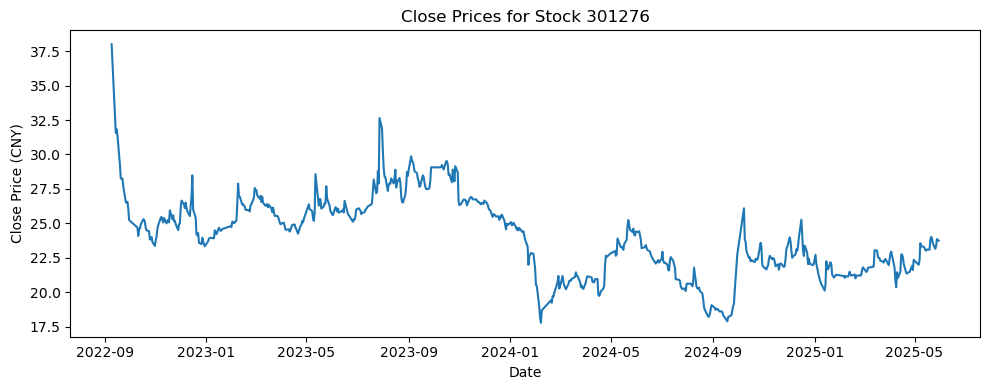

Date
2022-09-09    38.000000
2022-09-13    32.720000
2022-09-14    31.560000
2022-09-15    31.820000
2022-09-16    31.390000
                ...    
2025-05-26    23.147835
2025-05-27    23.388958
2025-05-28    23.860721
2025-05-29    23.785173
2025-05-30    23.746181
Name: High, Length: 656, dtype: float64


In [4]:
import sys, os, pandas as pd, matplotlib.pyplot as plt

stk = "301276"
price_series = pcnd.loc[pd.IndexSlice[:, stk], "High"].droplevel("StockID")

plt.figure(figsize=(10, 4))
plt.plot(price_series.index, price_series.values)
plt.title(f"Close Prices for Stock {stk}")
plt.xlabel("Date")
plt.ylabel("Close Price (CNY)")
plt.tight_layout()
plt.show()
print(price_series)

KeyError: '666666'